# Access GoodReads API using the `Goodreads` package

To access the GoodReads API, you first need a developer Key, which you can get by creating a GoodReads account on https://www.goodreads.com/api.

Then, install the [Goodreads package](https://github.com/pirmoradian/goodreads), which provides a Python interface for the GoodReads API. The readme file Readme.rst provides a clear instruction on how to install the package. It is very easy to set it up.

The first time you execute the notebook, add all credentials so that you can save them in the pkl file, then you can remove the secret keys from the notebook because they will just be loaded from the pkl file.
The pkl file contains sensitive information that can be used to take control of your twitter acccount, do not share it.

In [2]:
import pickle
import os
from goodreads import client
import re
import matplotlib.pyplot as plt
import requests
import xmltodict
%matplotlib inline

In [3]:
devkey_fn = 'secret_goodreads_credentials.pkl'
if not os.path.exists(devkey_fn):
    Goodreads = {}
    Goodreads['key'] = '', # Your developer Key
    Goodreads['secret'] =''  # Your developer secret         
    
    with open(devkey_fn, 'wb') as f:
        pickle.dump(Goodreads, f)
else:
    Goodreads = pickle.load(open(devkey_fn, 'rb'));

## Authorizing an application to access GoodReads data

Create a client instance to query Goodreads:

In [4]:
gc = client.GoodreadsClient(Goodreads['key'], Goodreads['secret'])

If you develop an app, where your customers write on Goodreads, you require OAuth for authorization. To get started, you first need to register your app.

OAuth is a simple way to allow third-party applications access to your data securly. It's based on existing standards and doesn't require you to give third-parties your username and password.

Unfortunately, calling this function raises an error, which has already been discussed [here](https://www.goodreads.com/topic/show/18844702-python-code-in-documentation-not-working). Because we cannot authorize this connection through OAuth, I could not run some functions related to reviews. Instead, I made a direct connection using the `Requests` library and `xmltodict` for getting those information later in this notebook.

In [4]:
# gc.authenticate() #<access_token>, <access_token_secret>)

## Retrieve data about a book

Get info about a book using book id or isbn.

In [72]:
book = gc.book(1)

Once you have the `GoodreadsBook` instance for the book, you can access data for the queried book.

In [73]:
book.title

u'Harry Potter and the Half-Blood Prince (Harry Potter, #6)'

In [7]:
book.isbn

u'0439785960'

Get info using isbn:

In [8]:
myisbn = '0439785960'
gc.book(isbn=myisbn)

Harry Potter and the Half-Blood Prince (Harry Potter, #6)

In [9]:
book.average_rating

u'4.55'

In [10]:
book.description[:200]

u'When Harry Potter and the Half-Blood Prince opens, the war against Voldemort has begun. The Wizarding world has split down the middle, and as the casualties mount, the effects even spill over onto the'

In [11]:
rating_dist_str = book.rating_dist
print rating_dist_str

5:1262418|4:485112|3:142576|2:22364|1:7766|total:1920236


In [12]:
rating_dist_str = re.sub(r'\d:', '', rating_dist_str)
print rating_dist_str

1262418|485112|142576|22364|7766|total:1920236


In [13]:
rating_dist = map(int, rating_dist_str.split('|')[:-1])
print rating_dist

[1262418, 485112, 142576, 22364, 7766]


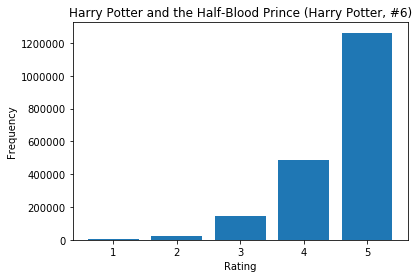

In [14]:
plt.bar(range(5, 0, -1), rating_dist)
plt.title(book.title)
plt.ylabel('Frequency')
plt.xlabel('Rating')

In [15]:
print book.popular_shelves

[to-read, fantasy, favorites, currently-reading, young-adult, fiction, harry-potter, books-i-own, owned, ya, series, favourites, magic, childrens, owned-books, re-read, adventure, children, j-k-rowling, children-s, sci-fi-fantasy, all-time-favorites, childhood, my-books, default, classics, audiobook, reread, 5-stars, audiobooks, i-own, favorite-books, children-s-books, middle-grade, novels, fantasy-sci-fi, kids, favorite, my-library, paranormal, read-more-than-once, ya-fantasy, teen, english, urban-fantasy, british, witches, jk-rowling, books, audio, re-reads, ya-fiction, read-in-2016, mystery, library, supernatural, my-favorites, read-in-2017, novel, childrens-books, harry-potter-series, own-it, faves, young-adult-fiction, 2005, scifi-fantasy, wizards, kindle, made-me-cry, favorite-series, juvenile, read-in-2015, romance, youth, shelfari-favorites, to-buy, all-time-favourites, my-bookshelf, bookshelf, childhood-favorites, favourite, 5-star, ebook, kids-books, rereads, to-re-read, read

In [16]:
book.similar_books

[Squire (Protector of the Small, #3),
 Mossflower (Redwall, #2),
 The Eternity Code (Artemis Fowl, #3),
 The Horse and His Boy (Chronicles of Narnia, #5),
 City of Masks (Stravaganza, #1),
 Rilla of Ingleside (Anne of Green Gables, #8),
 The Amber Spyglass (His Dark Materials, #3),
 The Fire Chronicle (The Books of Beginning, #2),
 The Carnivorous Carnival (A Series of Unfortunate Events, #9),
 Dangerous Angels (Weetzie Bat, #1-5),
 The Lives of Christopher Chant (Chrestomanci, #2),
 The Shamer's War (The Shamer Chronicles, #4),
 Lord of the Shadows (Cirque Du Freak, #11),
 The Forgotten (Animorphs, #11),
 The Enchanted Forest Chronicles (The Enchanted Forest Chronicles, #1-4),
 The Edge Chronicles 6: Midnight Over Sanctaphrax: Third Book of Twig]

In [17]:
book.text_reviews_count

u'23944'

Embed Goodreads book reviews on your site with an iframe. If you 

In [18]:
r_widget= book.reviews_widget
r_widget

u'<style>\n  #goodreads-widget {\n    font-family: georgia, serif;\n    padding: 18px 0;\n    width:565px;\n  }\n  #goodreads-widget h1 {\n    font-weight:normal;\n    font-size: 16px;\n    border-bottom: 1px solid #BBB596;\n    margin-bottom: 0;\n  }\n  #goodreads-widget a {\n    text-decoration: none;\n    color:#660;\n  }\n  iframe{\n    background-color: #fff;\n  }\n  #goodreads-widget a:hover { text-decoration: underline; }\n  #goodreads-widget a:active {\n    color:#660;\n  }\n  #gr_footer {\n    width: 100%;\n    border-top: 1px solid #BBB596;\n    text-align: right;\n  }\n  #goodreads-widget .gr_branding{\n    color: #382110;\n    font-size: 11px;\n    text-decoration: none;\n    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;\n  }\n</style>\n<div id="goodreads-widget">\n  <div id="gr_header"><h1><a rel="nofollow" href="https://www.goodreads.com/book/show/1.Harry_Potter_and_the_Half_Blood_Prince">Harry Potter and the Half-Blood Prince Reviews</a></h1></div>\n  <ifr

If you look at the `src` link, you will see a sample of reviews:

In [19]:
p = re.compile('src="(.*)" width')
p.findall(r_widget)[0]

u'https://www.goodreads.com/api/reviews_widget_iframe?did=DEVELOPER_ID&amp;format=html&amp;isbn=0439785960&amp;links=660&amp;min_rating=&amp;review_back=fff&amp;stars=000&amp;text=000'

### Search books for a given query

Get the most popular books for the given query. This will search all
        books in the title/author/ISBN fields and show matches, sorted by
        popularity on Goodreads.

In [20]:
books = gc.search_books('harry potter')

In [21]:
def prettyprint_book(books):
    row_template = "{:^7} | {:^20} | {:^10} | {:50}"
    print(row_template.format('BookID', 'Author', 'Avg Rating', 'Title'))
    print("*"*60)

    for book in books:
        auth = book.authors[0]
        print(row_template.format(book.gid, auth.name, book.average_rating, book.title[:50]))

In [22]:
prettyprint_book(books)

BookID  |        Author        | Avg Rating | Title                                             
************************************************************
   3    |     J.K. Rowling     |    4.45    | Harry Potter and the Sorcerer's Stone (Harry Potte
   5    |     J.K. Rowling     |    4.54    | Harry Potter and the Prisoner of Azkaban (Harry Po
 15881  |     J.K. Rowling     |    4.39    | Harry Potter and the Chamber of Secrets (Harry Pot
136251  |     J.K. Rowling     |    4.62    | Harry Potter and the Deathly Hallows (Harry Potter
   6    |     J.K. Rowling     |    4.54    | Harry Potter and the Goblet of Fire (Harry Potter,
   2    |     J.K. Rowling     |    4.47    | Harry Potter and the Order of the Phoenix (Harry P
   1    |     J.K. Rowling     |    4.55    | Harry Potter and the Half-Blood Prince (Harry Pott
862041  |     J.K. Rowling     |    4.74    | Harry Potter Boxset (Harry Potter, #1-7)          
29056083 |     John Tiffany     |    3.71    | Harry Potter and th

In [40]:
gc.book(1317181)

Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1)

In [41]:
gc.book(2)

Harry Potter and the Order of the Phoenix (Harry Potter, #5)

In [23]:
books = gc.search_books('Jane Austen')
prettyprint_book(books)

BookID  |        Author        | Avg Rating | Title                                             
************************************************************
 1885   |     Jane Austen      |    4.25    | Pride and Prejudice                               
 2152   |   Karen Joy Fowler   |    3.07    | The Jane Austen Book Club                         
 14935  |     Jane Austen      |    4.06    | Sense and Sensibility                             
 6969   |     Jane Austen      |    3.99    | Emma                                              
548739  | Laurie Viera Rigler  |    3.18    | Confessions of a Jane Austen Addict (Jane Austen A
 2156   |     Jane Austen      |    4.13    | Persuasion                                        
 50376  |    Claire Tomalin    |    3.99    | Jane Austen: A Life                               
 50398  |     Jane Austen      |    3.80    | Northanger Abbey                                  
34018949 |     Lucy Worsley     |    4.29    | Jane Austen at Home

## Retrieve data about an author

Retrieve an author data using an id by calling `author()` or using a name by calling `find_author()`.

In [24]:
author = gc.author(10)

In [25]:
author.name

u'Jude Fisher'

In [26]:
author.about

u'Jude Fisher is the pseudonym for <a href="https://www.goodreads.com/author/show/3842.Jane_Johnson" title="Jane Johnson" rel="nofollow">Jane Johnson</a>, who is the Publisher of HarperCollins\' science fiction and fantasy list, Voyager. She has also been involved in the publishing of JRR Tolkien\'s works for many years. As Gabriel King she has written four novels, with co-author M. John Harrison: THE WILD ROAD, THE GOLDEN CAT, THE KNOT GARDEN and NONESUCH. She is also the author of the official VISUAL COMPANIONS to Peter Jackson\'s movie trilogy of THE LORD OF THE RINGS. SORCERY RISING is her first solo novel. It will be followed by WILD MAGIC and THE WARS OF SORCERY.<br /><br />'

In [27]:
author.books

[The Lord of the Rings: The Return of the King: Visual Companion,
 The Lord of the Rings: The Fellowship of the Ring: Visual Companion,
 The Lord of the Rings: The Two Towers: Visual Companion,
 The Hobbit: An Unexpected Journey - Visual Companion,
 The Hobbit: The Desolation of Smaug - Visual Companion,
 Sorcery Rising (Fool's Gold, #1),
 Wild Magic (Fool's Gold, #2),
 The Rose of the World (Fool's Gold, #3),
 The Lord of the Rings: Complete Visual Companion,
 The Hobbit: The Battle of the Five Armies - Visual Companion]

In [28]:
author.born_at

In [29]:
author.fans_count

<bound method GoodreadsAuthor.fans_count of Jude Fisher>

In [30]:
author.gender

u'female'

In [31]:
author.gid

u'10'

In [32]:
author.works_count

u'10'

In [33]:
author.user

Retrieve data about an author using his/her name:

In [34]:
author = gc.find_author('Jane Austen')

In [35]:
author.books

[Pride and Prejudice,
 Sense and Sensibility,
 Emma,
 Persuasion,
 Mansfield Park,
 Northanger Abbey,
 The Complete Novels,
 Lady Susan,
 Northanger Abbey, Lady Susan, The Watsons, Sanditon,
 Lady Susan, The Watsons, Sanditon]

In [36]:
author.hometown

u'Steventon Rectory, Hampshire, England'

## Retreive data about users

User data can be retrieved by user id or username.

In [37]:
myuserid = 18180582
user = gc.user(myuserid)

In [38]:
user.name

u'Sahar Pirmoradian'

In [39]:
user.user_name

u'spirmora'

Retrieve the user data using username:

In [40]:
user = gc.user(username='spirmora')
user.name

u'Sahar Pirmoradian'

## Retrieve reviews written by a user

Get all books and reviews on user's shelves.

Calling the `reviews` function raises an error because we could not establish an `OAuth` authentication earlier. 

In [41]:
user.reviews(page=1)

AttributeError: GoodreadsClient instance has no attribute 'session'

Instead, I directly accessed the reviews page of a user using the `Requests` library by passing the dev `key` and the `user id`.

In [42]:
resp = requests.get('https://www.goodreads.com/review/list.xml', params=  {'key':Goodreads['key'], 'v': 2, 'id': myuserid})

If the connection was successfuly, you will get Response 200:

In [43]:
data_dict = xmltodict.parse(resp.content)['GoodreadsResponse']

In [44]:
reviews_books = [r for r in data_dict['reviews']['review']]

In [45]:
for r_book in reviews_books:
    print list(r_book.items())[2]

(u'rating', u'3')
(u'rating', u'4')
(u'rating', u'4')
(u'rating', u'5')
(u'rating', u'4')
(u'rating', u'5')
(u'rating', u'0')
(u'rating', u'1')
(u'rating', u'3')
(u'rating', u'5')
(u'rating', u'4')
(u'rating', u'4')
(u'rating', u'5')
(u'rating', u'0')
(u'rating', u'2')
(u'rating', u'0')
(u'rating', u'4')
(u'rating', u'4')
(u'rating', u'4')
(u'rating', u'0')


## Review statistics of books

Get review statistics for books given a list of ISBNs.

In [46]:
# gid of sense and sensibilty = 14935
gid = 14935
book = gc.book(gid)

In [47]:
book.title

u'Sense and Sensibility'

In [48]:
# ISBNs were 10 digits in length up to the end of December 2006, 
# but since 1 January 2007 they now always consist of 13 digits
print book.isbn
print book.isbn13

0141439661
9780141439662


The input to `book_review_stats()` has to be in the format of a list - even if it is only one isbn, put it in a list.


The `ratings_count` and `reviews_count` keys in the objects represent the total number of ratings cast and reviews made for *that particular edition of the book*. Similarly , `text_reviews_count` represents the total text-only reviews of the particular edition of the book. Whereas, `work_ratings_count`, `work_reviews_count` and `work_text_reviews_count` represent the total ratings, reviews and text-only reviews of *all the editions*.

In [49]:
gc.book_review_stats([book.isbn])

[{u'average_rating': u'4.06',
  u'id': 14935,
  u'isbn': u'0141439661',
  u'isbn13': u'9780141439662',
  u'ratings_count': 772768,
  u'reviews_count': 1154342,
  u'text_reviews_count': 8900,
  u'work_ratings_count': 817907,
  u'work_reviews_count': 1256388,
  u'work_text_reviews_count': 12490}]

## List events happening in an area

Show events near a location specified with the postal code:

In [50]:
mypostcode = 95616
events = gc.list_events(mypostcode)

In [61]:
row_template = "{:^10} | {:^20} | {:50}"
print(row_template.format('Date', 'City', 'Event Title'))
print("*"*60)

for event in events:
    date = event.start_at.split('T')[0]
    print(row_template.format(date, event.city, event.title[:50].encode('utf-8')))

   Date    |         City         | Event Title                                       
************************************************************
2018-05-30 |    San Francisco     | Author Joseph Rodota Shares History of The Waterga
2018-06-15 |      Sacramento      | Waking up White Book Club                         
2018-06-23 |      Sacramento      | Bookapalooza, a Book and Literary Craft Fair      
2018-06-06 |        Quincy        | The Haunted Serpent Book Launch Party             
2018-06-01 |       San Jose       | Book Signing - The Broken Lance - Historical Novel
2018-06-14 |    San Francisco     | Allison Pearson at Bookshop West Portal           
2018-06-22 |    San Francisco     | Michelle Gable at Bookshop West Portal            
2018-07-12 |       Berkeley       | Thomas Frank at St. Johns Presbyterian Church     
2018-07-13 |     Corte Madera     | Thomas Frank at Book Passage                      
2018-05-30 |      Burlingame      | Shobha Rao at the Burlingame Publ

## Retrieve a review given a review ID

In [71]:
review_id = 200
review = gc.review(review_id)

In [72]:
review.body

u'A really well written book that takes you into the far away world of Afghanistan. Highly recommend it.<br /><br />I loved this book, but I must say that one of the things that perhaps made it so emotional was that the main character was such a pansey it made it hard to like him.'

In [73]:
review.book['title']

u'The Kite Runner'

In [74]:
review.rating

u'5'

In [75]:
review.read_at

u'Sat Apr 01 00:00:00 -0800 2006'

In [76]:
review.shelves

[u'read', u'fiction', u'afghanistan', u'fiction', u'middleeast', u'asia']

In [77]:
gc.review(300).book['title']

u'Consciousness Explained'

In [95]:
recent_reviews = gc.recent_reviews()
print recent_reviews

[review [2400714242], review [2400713772], review [2400713543], review [2400713456], review [2400713367], review [2400713214], review [2400713181], review [2400713058], review [2400712982], review [2400712957], review [2400712823], review [2400712717], review [2400712667], review [2400711717], review [2400711691], review [2400711630], review [2400711217], review [2400711210], review [2400711124], review [2400711103]]


The most recent book that has been reviewed:

In [98]:
r_recent = recent_reviews[0]
no_reviews = r_recent.gid
gc.review(no_reviews).book['title']

u"Mate's Call"

In [97]:
no_reviews

u'2400714242'

In [108]:
r_recent.body

u"So apparently nothing happens in this one and it's just fluff? If so, I'll save this for another time."

## Retrieve ratings and dates for all books

To measure how much the popularity of a book has been changed over time, I would like to plot the review ratings for a book versus time.

I go through all reviews and store the ratings and the year a rating has been recorded in dictionary `d_rev`.

In [ ]:
d_rev = {}
counter = 0
for i in range(no_reviews):
    try:
        r = gc.review(i)
        book_id = int(r.book['id']['#text'])
        if r.read_at:
            if book_id not in d_rev:
                d_rev[book_id] = []
            d_rev[book_id].append((int(r.read_at.split()[-1]), int(r.rating)))
        #if re.match(book_title, review.book['title'], re.IGNORECASE):
    except:
        counter += 1
print 'No of books without reviews:', counter
print 'No of books with reviews:', len(d_rev)

Store the dictionary of ratings for later reference:

In [93]:
rev_fn = 'reviews_allbooks.pkl'

if not os.path.exists(rev_fn):    
    # save the review dictionary
    with open(rev_fn, 'wb') as f:
        pickle.dump(d_rev, f)
else:
    d_rev_loaded = pickle.load(open(rev_fn, 'rb'));